# Chat Bot

## Set up

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import telegram
import spacy
import nltk

## Importing Data

In [14]:
import pandas as pd
seek_data = pd.read_csv("seek_australia.csv")

## Data Exploration

In [15]:
seek_data["job_description"] = seek_data["job_description"].astype(str)
cat_jdesc = seek_data.groupby("category")["job_description"].apply(' '.join).reset_index()
corpus = dict()


for category in seek_data["category"].unique():
    corpus[category] = [row for row in seek_data[seek_data["category"] == category]["job_description"]]

In [54]:
seek_data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [52]:
seek_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         30000 non-null  object
 1   city             30000 non-null  object
 2   company_name     30000 non-null  object
 3   geo              30000 non-null  object
 4   job_board        30000 non-null  object
 5   job_description  30000 non-null  object
 6   job_title        30000 non-null  object
 7   job_type         30000 non-null  object
 8   post_date        30000 non-null  object
 9   salary_offered   8952 non-null   object
 10  state            19180 non-null  object
 11  url              30000 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [23]:
seek_data.describe()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,8952,19180,30000
unique,30,65,9054,1,1,26851,20979,4,24747,5373,19,30000
top,Trades & Services,Sydney,Private Advertiser,AU,seek,nan,Business Development Manager,Full Time,2018-04-16T09:29:00Z,"$100,502 - $114,624",CBD & Inner Suburbs,https://www.seek.com.au/job/35989382
freq,3346,9412,1491,30000,30000,345,122,20203,14,130,4690,1


In [16]:
print(seek_data["category"].unique())

['Retail & Consumer Products' 'Government & Defence' 'Trades & Services'
 'Manufacturing, Transport & Logistics' 'Sales'
 'Community Services & Development' 'Healthcare & Medical'
 'Information & Communication Technology' 'Mining, Resources & Energy'
 'Construction' 'Design & Architecture' 'Call Centre & Customer Service'
 'Marketing & Communications' 'Administration & Office Support'
 'Banking & Financial Services' 'Engineering' 'Education & Training'
 'Accounting' 'Human Resources & Recruitment' 'Real Estate & Property'
 'Sport & Recreation' 'Legal' 'Hospitality & Tourism'
 'Consulting & Strategy' 'Farming, Animals & Conservation'
 'Advertising, Arts & Media' 'Insurance & Superannuation'
 'Self Employment' 'CEO & General Management' 'Science & Technology']


### plots

In [ ]:
# word frequency calculator
def category_freq_plot(category, data=corpus):
    fdist = FreqDist(data[category])
    fdist.plot(30)
    

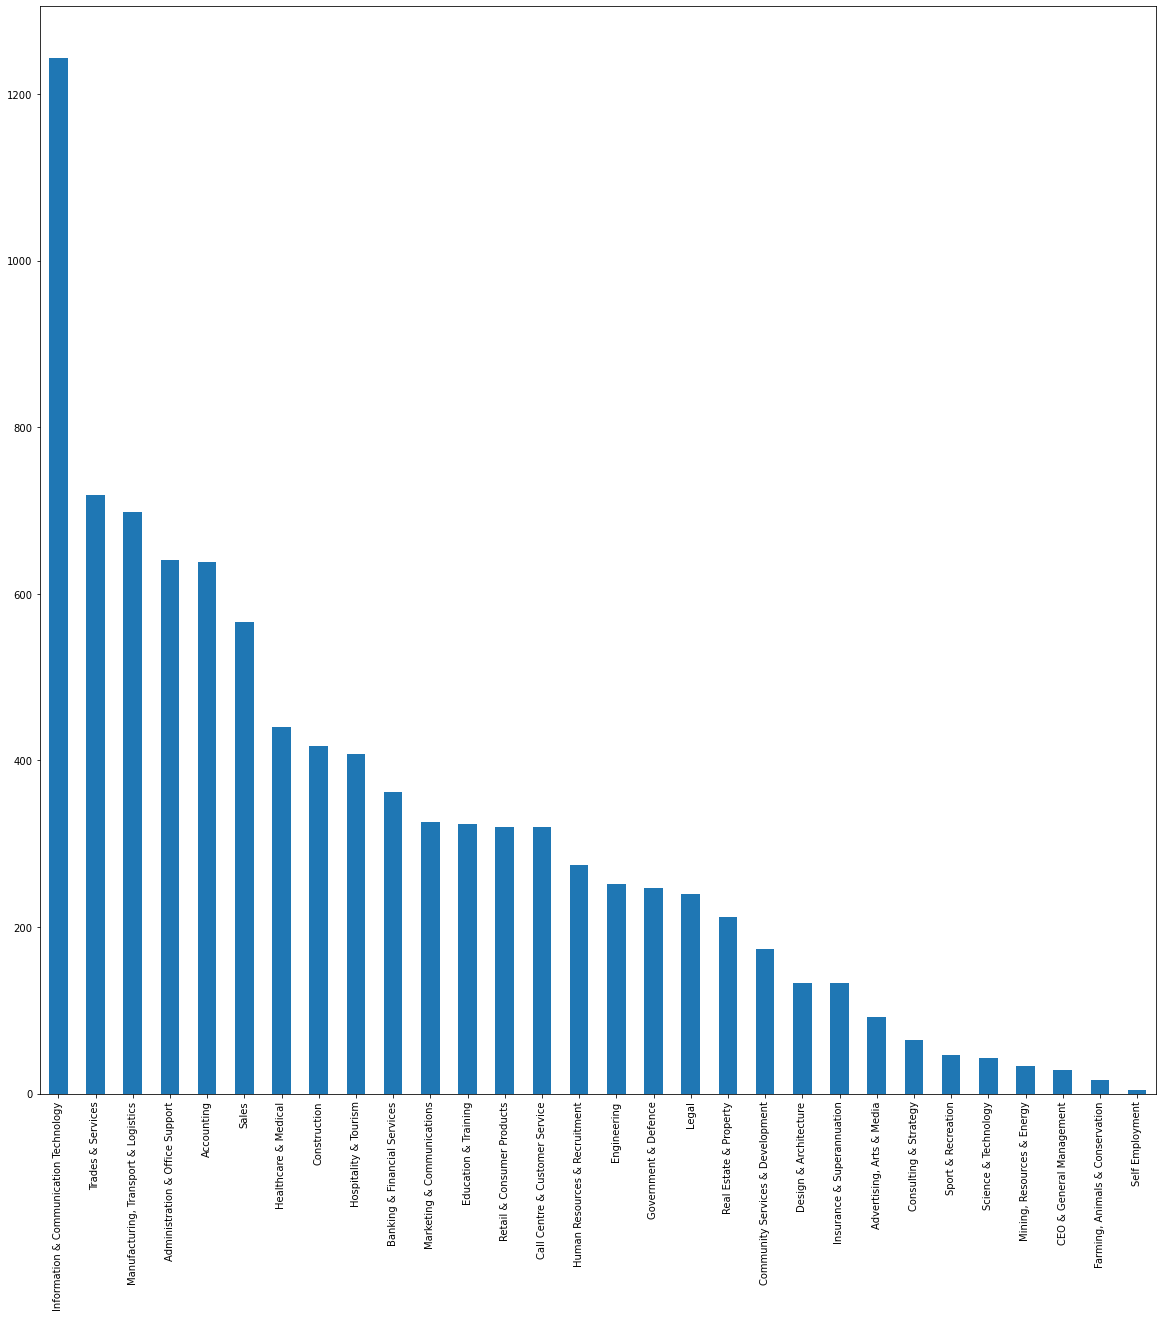

In [24]:
city_category_freq("Sydney")

"Information and communication Technology" and "Trades & Service" are the most frequent in Sydney. This information will inform waht categories to concentrate on while creating the chat bot.

The plot above is not very infromative.

<AxesSubplot:>

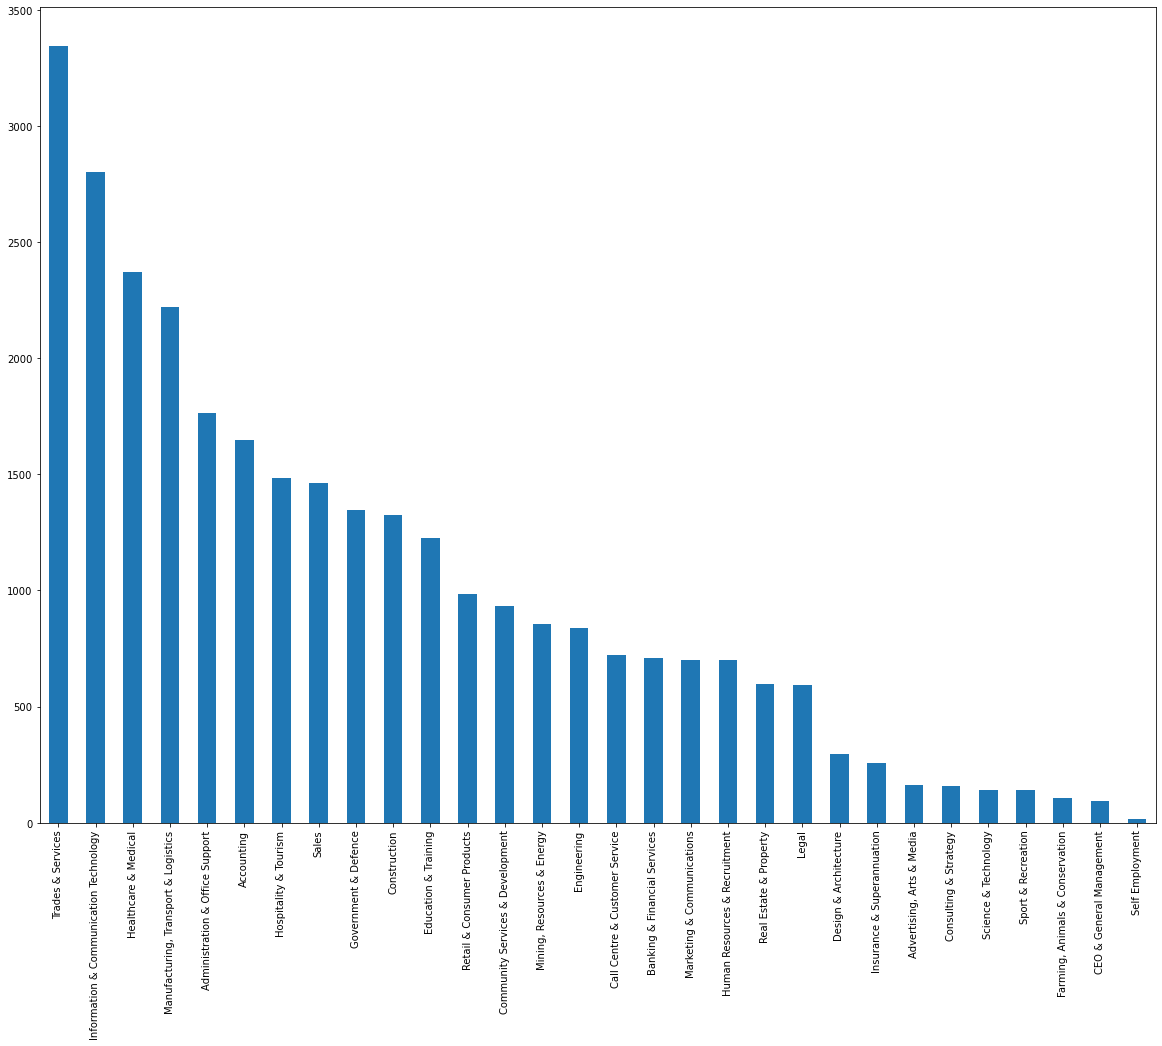

In [11]:

fig, ax = plt.subplots(figsize=(20,15)) 
seek_data["category"].value_counts().plot(kind='bar')

Supporting to Sydney's plot, the whole of Australia has "Trades & Services" and "Information & Communication Technologies" jobs toping the frequency list. The ordering does not deviate much, thus maintain prior prioritisation when building bot.

#### Tokenize

In [18]:
from nltk.tokenize import word_tokenize
# creating a dictionary of toekenized job Category Descriptions.
# tokenised category Job description
cat_tok = dict()

for i in range(len(cat_jdesc["category"])):
    cat_tok[cat_jdesc["category"][i]] = word_tokenize(cat_jdesc["job_description"][i]) 

In [19]:
# vocabulary Size

for key in cat_tok.keys():
    print( f"{key} Vocab size = {len(set(cat_tok[key]))}")
cat_vocab["Category"] = list(cat_tok.keys())

Accounting Vocab size = 17773
Administration & Office Support Vocab size = 21575
Advertising, Arts & Media Vocab size = 6412
Banking & Financial Services Vocab size = 11728
CEO & General Management Vocab size = 4998
Call Centre & Customer Service Vocab size = 12766
Community Services & Development Vocab size = 13789
Construction Vocab size = 16762
Consulting & Strategy Vocab size = 6526
Design & Architecture Vocab size = 7771
Education & Training Vocab size = 19764
Engineering Vocab size = 14952
Farming, Animals & Conservation Vocab size = 5111
Government & Defence Vocab size = 18310
Healthcare & Medical Vocab size = 25411
Hospitality & Tourism Vocab size = 17005
Human Resources & Recruitment Vocab size = 12764
Information & Communication Technology Vocab size = 29179
Insurance & Superannuation Vocab size = 6095
Legal Vocab size = 9850
Manufacturing, Transport & Logistics Vocab size = 22671
Marketing & Communications Vocab size = 14419
Mining, Resources & Energy Vocab size = 13452
Real

At the tokenized level, "Information & Communication Technology" categpry has the most diverse Vocabulary followed by Trades and Services. This is expected since the two have the highest positing frequency and thus more likely to have a larger vocubulary.

In [20]:
cat_vocab = pd.DataFrame()
cat_vocab["Category"] = list(cat_tok.keys())
cat_vocab["Tokenized"] = [len(set(cat_tok[key])) for key in cat_tok.keys()]

In [73]:
from nltk import FreqDist

def category_freq(city, data=cat_tok):
    fdist = FreqDist(data[city])
    fdist.plot(50)

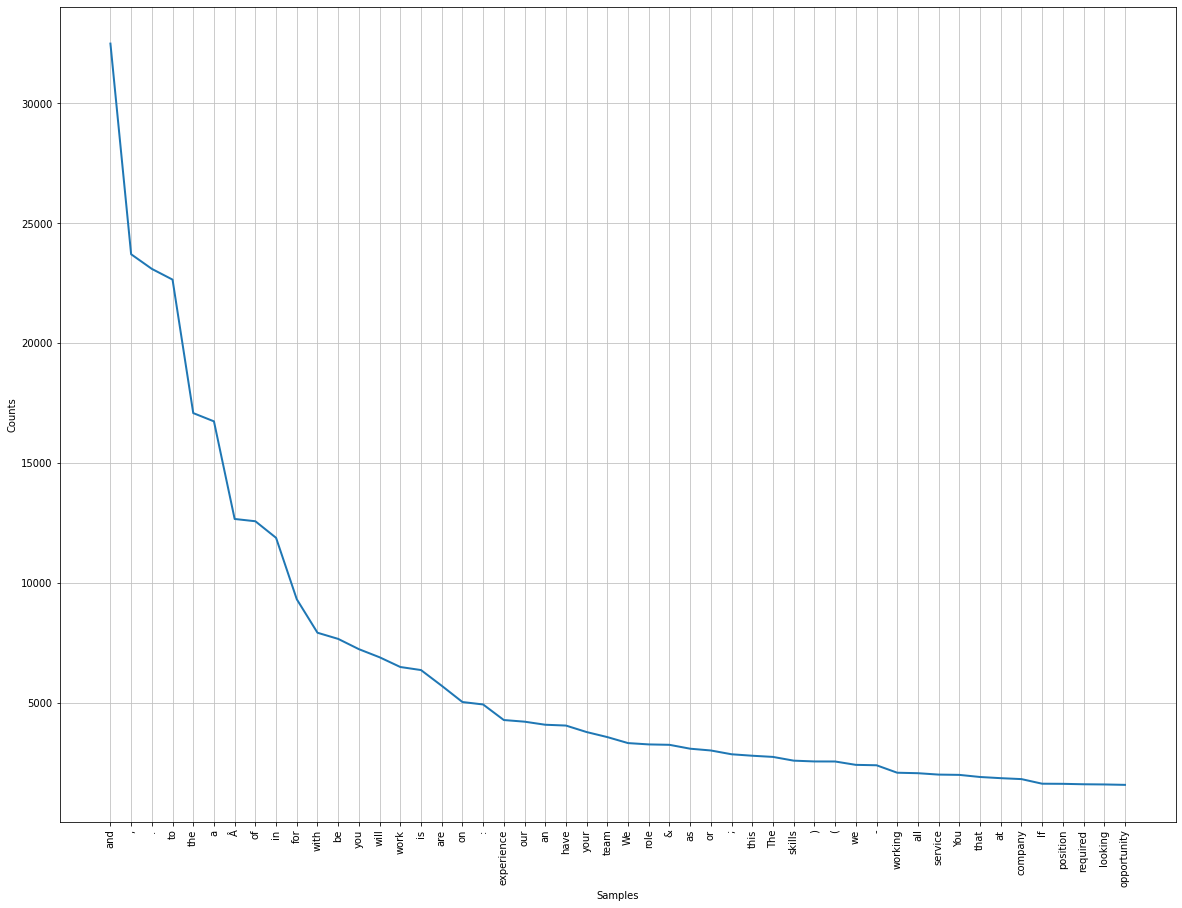

In [74]:
plt.subplots(figsize=(20,15)) 
category_freq("Trades & Services")

As expected,stop words and punctuations make up a majority of the top 30 , eliminating stop words will be crucial for any document classification and retrieval. We filter words by word length to get a more meaningful frequency graph

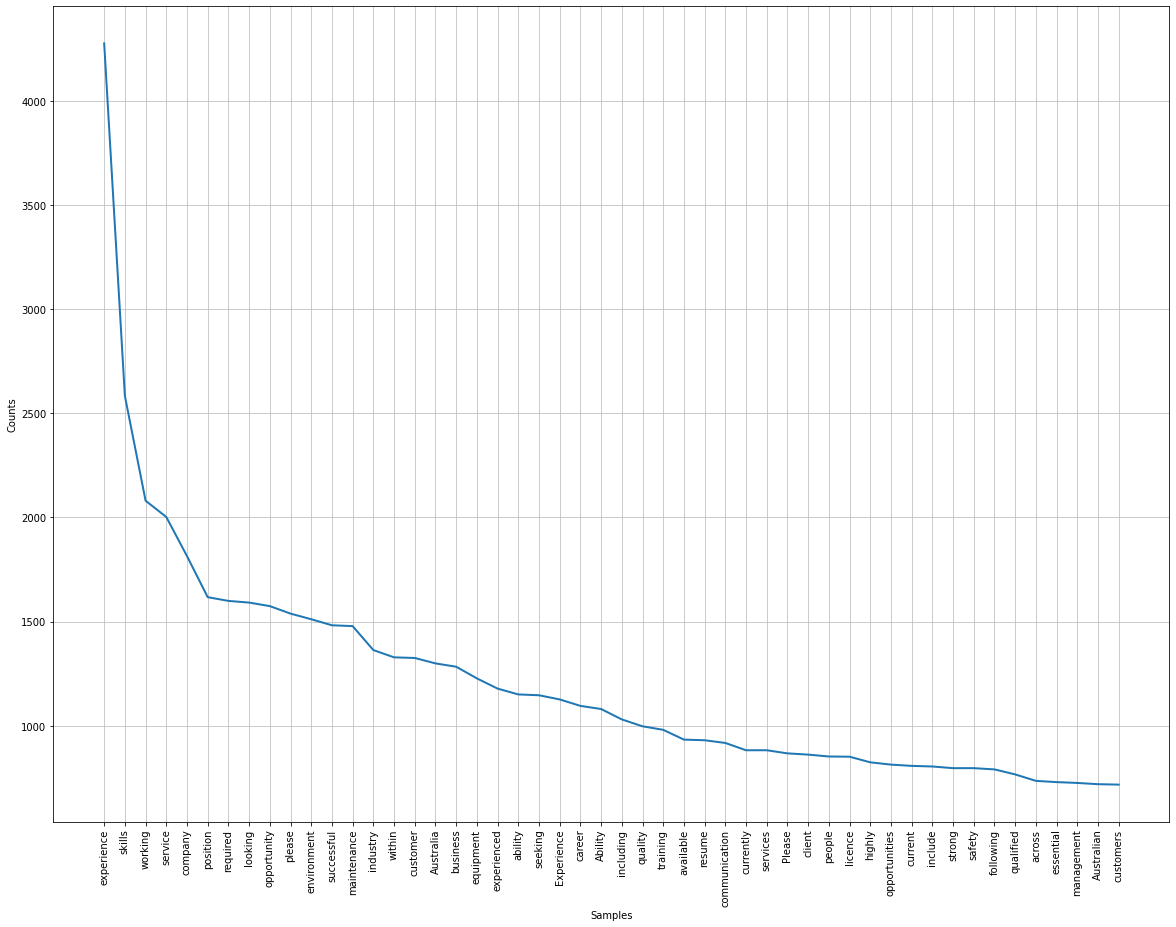

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [81]:
fdist = FreqDist(filter(lambda word: len(word) >=6 ,cat_tok["Trades & Services"]))
plt.subplots(figsize=(15,15))
fdist.plot(50)

In [32]:
def cloud_plot(wordcloud): 
    plt.figure(figsize=(20, 20))
    plt.axis("off")
    plt.imshow(wordcloud) 

In [10]:
from wordcloud import WordCloud
cloud = WordCloud(width = 3000, height = 2000,
                       collocations=False).generate(" ".join(cat_tok["Trades & Services"]))

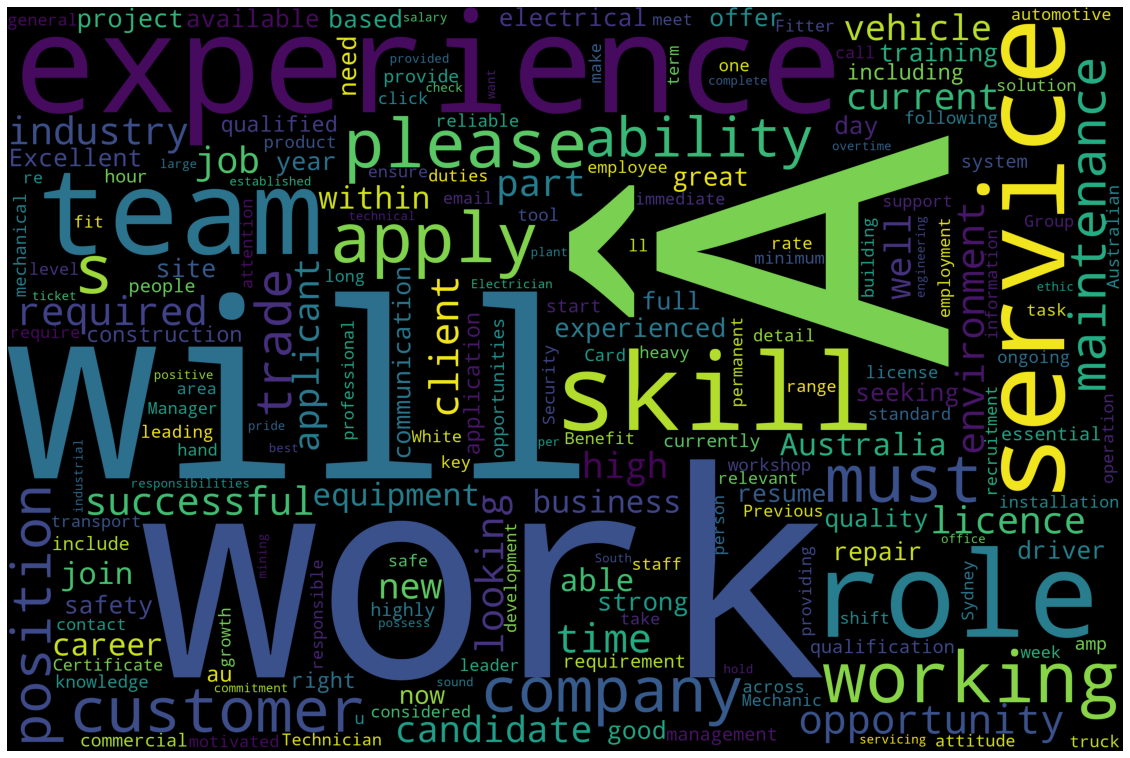

In [13]:
cloud_plot(cloud)

The longer words are also generic nouns and verbs that can be found in any document and thus,s not usfeull for differentiating. Filtration by ranking with the TFIDF value will appropriately provide greater distincion. 

#### Lemmatize v Stemming

In [26]:
import nltk
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language='english')
cat_stem = dict()
for key in cat_tok.keys():
    cat_stem[key] = [stemmer.stem(word) for word in cat_tok[key]]

In [27]:
# vocabulary Size

cat_vocab["Stemming"] = [len(set(cat_stem[key])) for key in cat_stem.keys()]

In [36]:
from wordcloud import WordCloud
cloud = WordCloud(width = 3000, height = 2000,
                       collocations=False).generate(" ".join(cat_stem["Trades & Services"]))

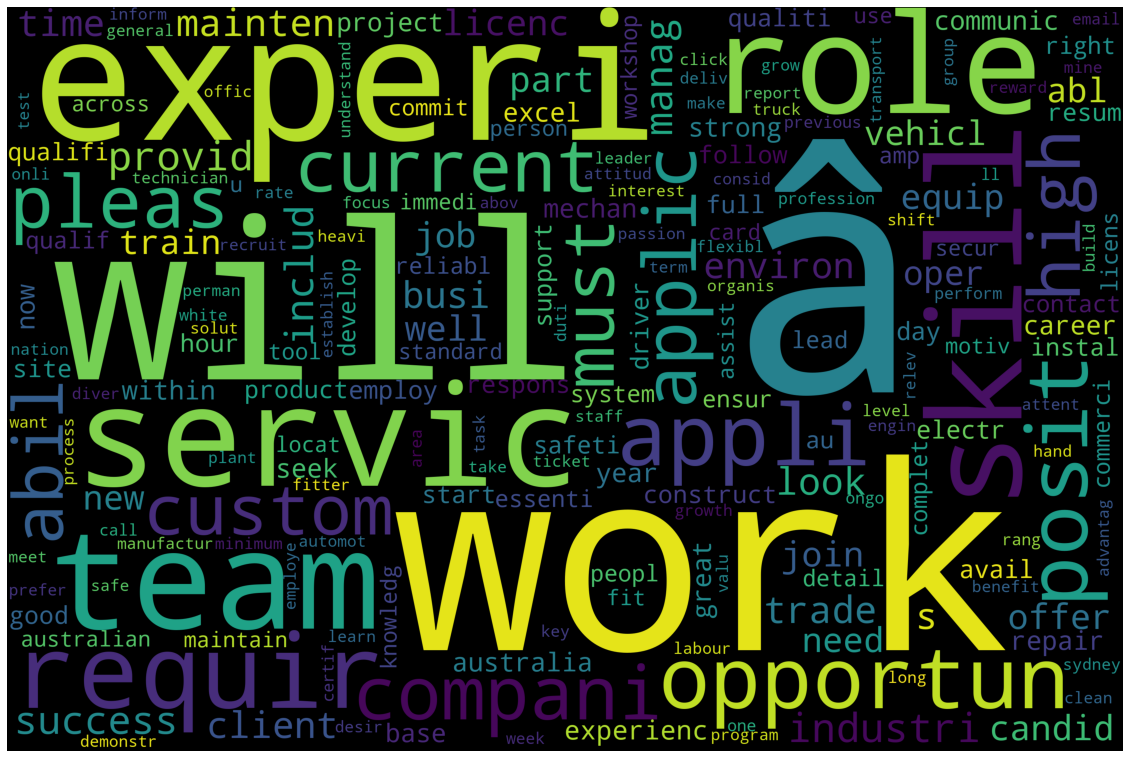

In [37]:
cloud_plot(cloud)

In [ ]:
#stemming
import spacy
nlp = spacy.load("en_core_web_sm")

for key in corpus.keys():
    for i in range(len(corpus[key])):
        corpus[key][i] = nlp(corpus[key][i])


In [11]:
for key in corpus.keys():
    for doc in corpus[key]:
        doc = [token.lemma for token in  doc]


In [23]:
cat_vocab["Lemmatized"] = [len(set(corpus[key])) for key in corpus.keys()]

In [29]:
from wordcloud import WordCloud
cloud = WordCloud(width = 3000, height = 2000,
                       collocations=False).generate(" ".join(corpus["Trades & Services"]))

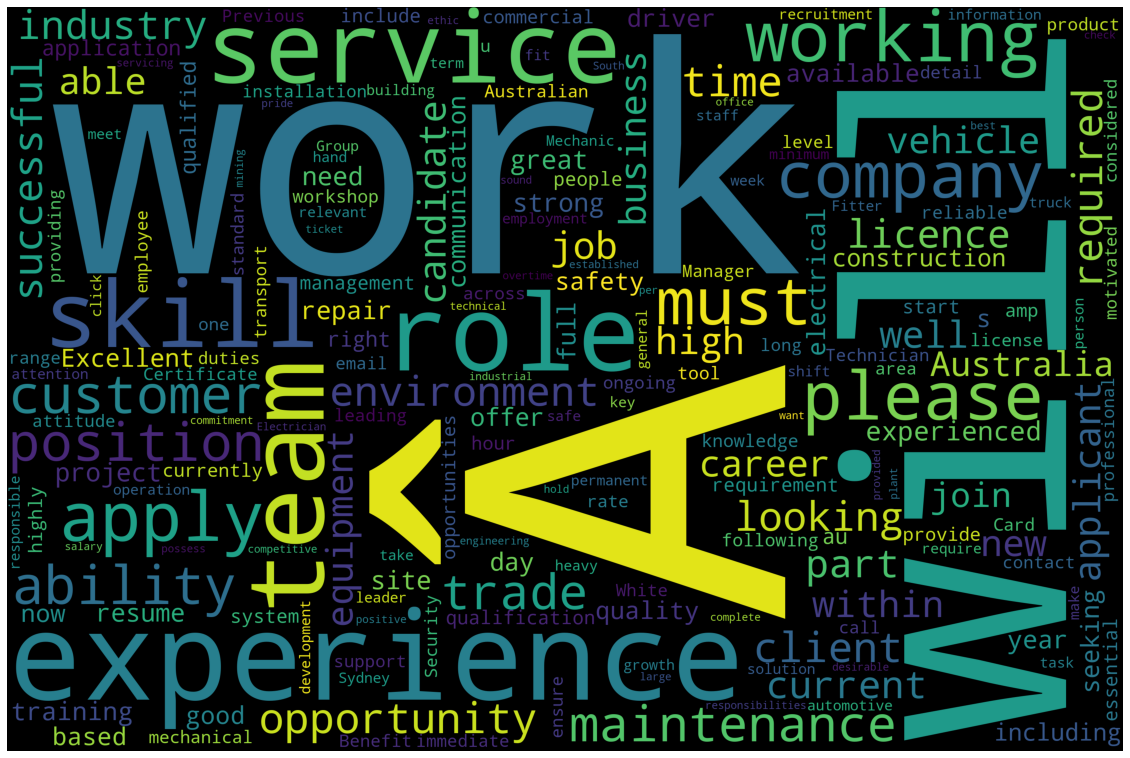

In [35]:
cloud_plot(cloud)

<AxesSubplot:title={'center':'Category v Vocabulary size'}, xlabel='Category', ylabel='Vocabulary size'>

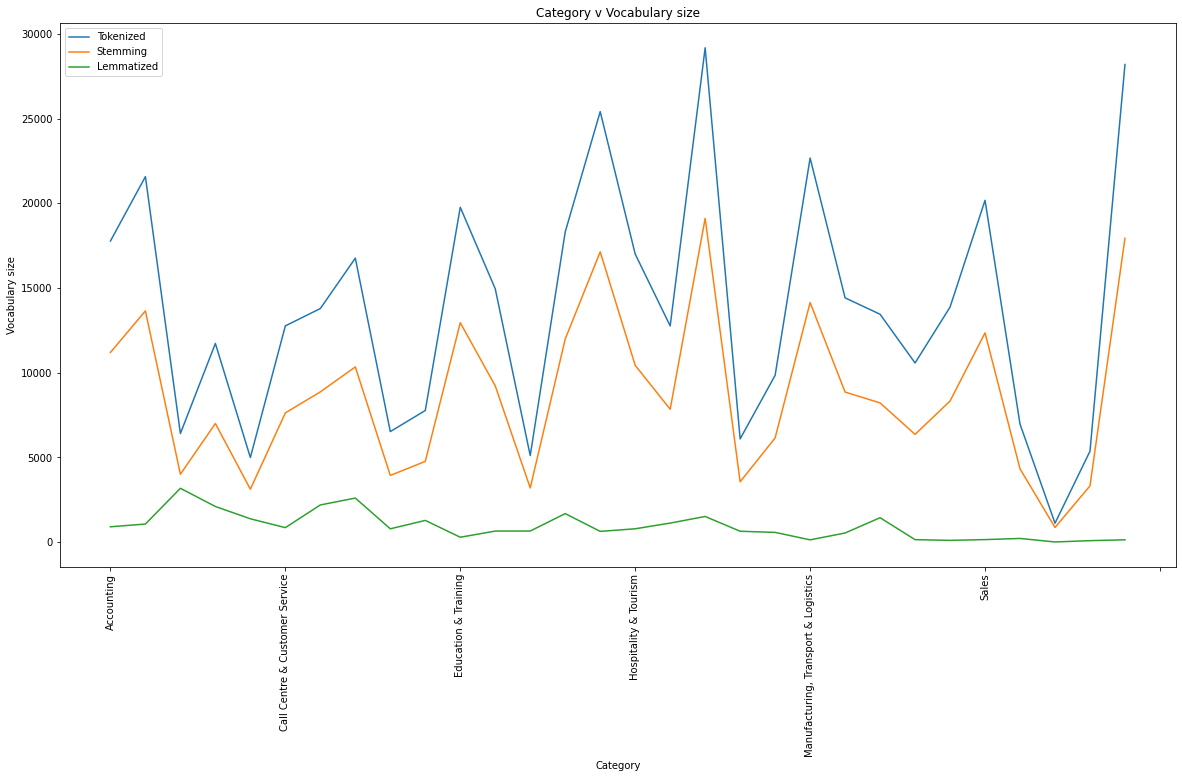

In [30]:

cat_vocab.plot(x = "Category",figsize=(20, 10), title = "Category v Vocabulary size", xlabel = "Category", ylabel = "Vocabulary size",rot=90 )

Evidently, as expected, the lemmatizer does a better job because it takes context into consideration and can reduce verbs from their conjugation to the original form.  

## Preprocessing 

In [4]:
# Tokenizing, Stemming, PROCESSING FOR tags 
import spacy
nlp = spacy.load("en_core_web_sm")

for key in corpus.keys():
    for i in range(len(corpus[key])):
        corpus[key][i] = nlp(corpus[key][i])
    

In [ ]:
import pickle
with open("corpus.pkl", "wb") as f:
    pickle.dump(corpus,f)

In [5]:
# Merging and extracting noun chunks and exporting merged chunks.

for key in corpus.keys():
    noun_corpus = []
    for i in range(len(corpus[key])):
        noun_list = []
        with corpus[key][i].retokenize() as retokenizer:
            for chunk in corpus[key][i].noun_chunks:
                retokenizer.merge(chunk)
                noun_list.append(chunk.lemma_)
        noun_corpus.append(noun_list)
    with open(f"{key}_Corpus.pkl", "wb") as f:
        pickle.dump(noun_corpus,f)
    

In [ ]:
## finding Experience using linguistic pattern



pattern = [{"LEMMA": {"IN": ["experience", "qualification","skill", "ability"]}}]
pattern2 = [{"LEMMA":"succeed"}]
from spacy.matcher import Matcher

exp_dict = dict()
for key in corpus.keys():
    matcher = Matcher(nlp.vocab)
    #matcher.add('Exp', [nlp("experience"), nlp("Experience")], nlp("Qualifications"))
    matcher.add("Pattern1",[pattern])
    exp_list = []
    for i in range(len(corpus[key])):
        
        doc = corpus[key][i]
        matches = matcher(doc)
        exp = ""
        noun_found = False
        
        for match in matches:
            count = 0
            start = match[1]
            if start > last_tok_pos:
                if doc[start].pos_ == "NOUN" or doc[start].lemma_ in ["succeed"]:
                    exp = " ".join([token.text for token in doc[start].subtree])

        exp_list.append(exp)
    exp_dict[key] = exp_list

The function above identifies areas that have the lemmatize noun word experience then, Searches for the entire sentence following that word. More often than not, the sentence will contain the required expereince.

#### TFIDF

UPDATED
Below we explore TFID, remove irrelevant words and stop words by investigating the TFIDF value of the "Trades service" and selecting the TFIDF value from this dataset to apply to the rest of the categories. We use "Trade and service" Jobs since it has the highest frequency of job and is more likely to capture an underlying TFIDF value for stop words if it exists.

In [3]:
import pickle
corp2 =dict()
for category in corpus.keys():
    with open(f"{category}_Corpus.pkl", 'rb') as f:
 
        noun_list = pickle.load(f)
    
    corp2[category] = noun_list

In [4]:
# create a dictionary of corpa.dictionaries for each category

from gensim.corpora import Dictionary
dictionary = dict()
for category in corp2.keys():
    dictionary[category] = Dictionary([doc for doc in corp2[category]])

In [5]:
## Usea each job category as a Corpus and GET TFIDF for each document

import gensim.downloader as api
from gensim.models import TfidfModel

BoW_corpus = dict()
for category in dictionary.keys():
    BoW_corpus[category] = [dictionary[category].doc2bow(doc, allow_update=True) for doc in 
    corp2[category]]


In [10]:
import numpy as np
tfidf = dict()
for category in BoW_corpus.keys():
    tfidf[category] = TfidfModel(BoW_corpus[category], smartirs='ntc')

In [17]:
expolore_tfidf = []
for doc in tfidf["Trades & Services"][BoW_corpus["Trades & Services"]]:
        
        expolore_tfidf = expolore_tfidf + [(dictionary["Trades & Services"][id], np.around(freq,decimals=2)) for id, freq in doc]
        expolore_tfidf = list(set(expolore_tfidf))

In [18]:
 expolore_tfidf.sort(key = lambda tup:tup[1])
 expolore_tfidf

[('Qualifications and Competencies Bachelor degree', 0.01),
 ('waste Support', 0.04),
 ('this position', 0.05),
 ('product stability trials', 0.05),
 ('our products positive manner', 0.06),
 ('this role', 0.06),
 ('the Best Places', 0.06),
 ('Only candidates', 0.08),
 ('more pharmaceutical or medical related job opportunities', 0.08),
 ('™ journey', 0.08),
 ('tools', 0.08),
 ('limited supervision', 0.08),
 ('this company', 0.08),
 ('sales experience', 0.08),
 ('a New Product Development position', 0.08),
 ('a strong presence', 0.08),
 ('sales penetration', 0.08),
 ('an experienced NPD Specialist', 0.08),
 ('Effective stakeholder and relationship management', 0.08),
 ('your budgets', 0.08),
 ('Excellent communication skills', 0.08),
 ('Identifying', 0.08),
 ('organisational skills', 0.08),
 ('point', 0.08),
 ('other healthcare related job opportunities', 0.08),
 ('3rd place pre-packed display activation solutions Collaboration', 0.09),
 ('withÂ\xa0current compliance and regulatory requi


From the print out above, it seems like a TFIDF value of above 0.1 is sufficient to extract valuable information from the document.

### Creating Json for all collected info

In [70]:
# UPDATE
word_tfidf = dict()
cat_tfidf = dict()
for category in BoW_corpus.keys():
    cat_list = []
    cat_comb = ""
    for doc in tfidf[category][BoW_corpus[category]]:
        temp = []
        temp = temp + [(dictionary[category][id], np.around(freq,decimals=2)) for id, freq in doc]
        temp = list(set(temp))
        temp.sort(key = lambda tup:tup[1], reverse=True)
        final_noun_list = [tup[0] for tup in list(filter(lambda tup:tup[1] > 0.08, temp)) ]
        #final_noun_list = temp[:50]
        cat_comb += " ".join(final_noun_list)
        cat_list.append(" ".join(final_noun_list))
    
    word_tfidf[category] = cat_list
    cat_tfidf[category] = cat_comb

In [78]:
## UPDATE CREATING JSON 
category_index = dict()
for category in seek_data["category"].unique():
    
    category_index[category] = seek_data[seek_data["category"] == category].index


In [53]:
import pickle
with open('word_tfidf.pkl', 'wb') as outp:
    
    pickle.dump(word_tfidf, outp)

with open('cat_tfidf.pkl', 'wb') as outp:
    
    pickle.dump(cat_tfidf, outp)

In [102]:
## Creating Json FIlES
json_info = dict()
for key in corpus.keys():
    indexes = list(category_index[key])
    corp = []
    for i in range(len(corpus[key])):
        index = indexes[i]
        row = seek_data.iloc[index,:]
        doc = {   "job_title": row["job_title"],
               "location": row["city"] ,
        "job_type": row["job_type"], 
               "exp":exp_dict[key][i], 
               "company_name":row["company_name"], 
        "job_description": row["job_description"] }
        corp.append(doc)
    json_info[key] = corp

In [ ]:
with open(f"json_info.pkl", "wb") as f:
        pickle.dump(json_info,f)

### Linguistic Patterns

In [18]:
# unique information about job information 
location = list(seek_data["city"])
job_category = list(seek_data["category"])

job_name = list(seek_data["job_title"])

company_name = list(seek_data["company_name"])

In [21]:
# Linguistic partens
job_info = ['location', 'company_name', 'job_category']
# pattern_discover = dict()

for info in job_info:
    loc_patterns = []
    for loc in eval(info):
        
        doc = nlp(f"I am looking for a job in {loc}")
        cur_loc = [ {"DEP": token.dep_} for token in doc[6:]]

        loc_patterns.append(cur_loc)
        
    loc_patterns.sort(key=lambda lis: len(lis))
    pattern_discover[info] = loc_patterns


In [42]:
pattern_discover["job_name"] = loc_patterns

In [98]:
loc_patterns = []
for loc in job_name:
    doc = nlp(f"I am looking for a job as a {loc}")
    cur_loc = [ {"DEP": token.dep_} for token in doc[6:]]

    loc_patterns.append(cur_loc)
    doc = nlp(f"I am looking for {loc} jobs ")
    cur_loc = [ {"DEP": token.dep_} for token in doc[3:]]

    loc_patterns.append(cur_loc)
        
    loc_patterns.sort(key=lambda lis: len(lis))
pattern_discover["job_name"] = loc_patterns

In [99]:
with open(f"pattern_discover.pkl", "wb") as f:
        pickle.dump(pattern_discover,f)

In [16]:
with open(f"pattern_discover.pkl", "rb") as f:
        pickle.load(f)

##### Pattern plots

A genereic sentence is used to generat information about other properties of the job details. For 'location', 'company_name', 'job_category' a preposition befor the names are used. For location a combination of preposition before an preposition with determinant is used.

<AxesSubplot:>

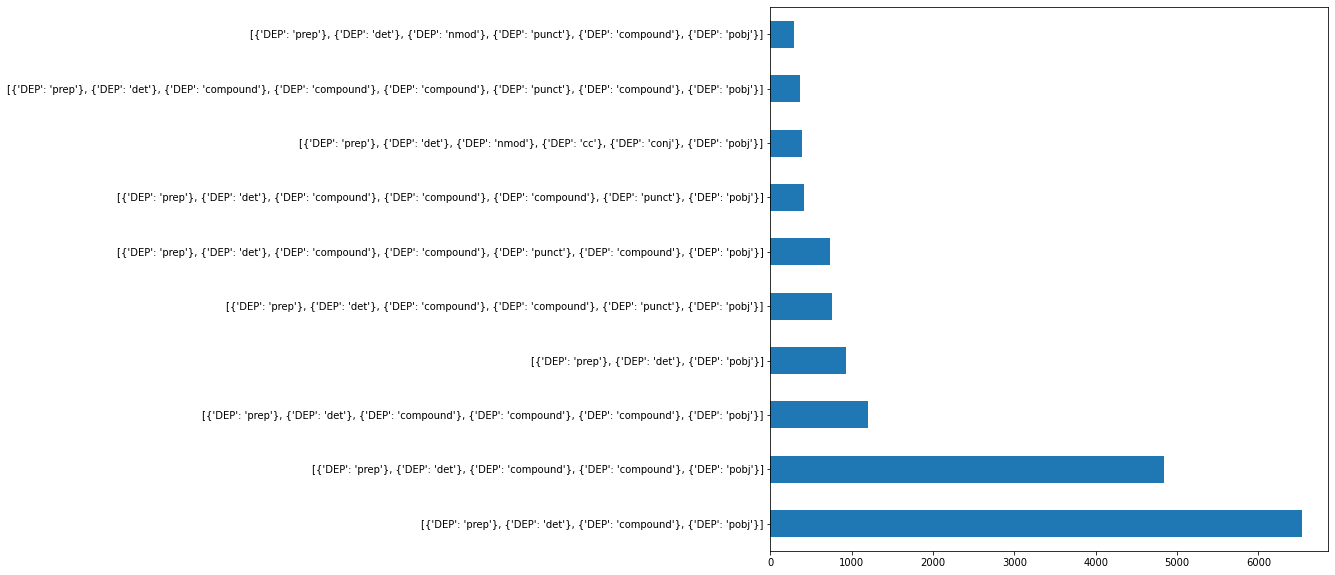

In [22]:
job_name_count =  pd.Series(pattern_discover["job_name"]).value_counts()
pd.Series(pattern_discover["job_name"]).value_counts()[:10].plot(kind = "barh", figsize=(10, 10))

A a majority of the jobs names are made up of compounds and punctuations. We can capture more a large majority of the positions designing with the first few in mind.

<AxesSubplot:>

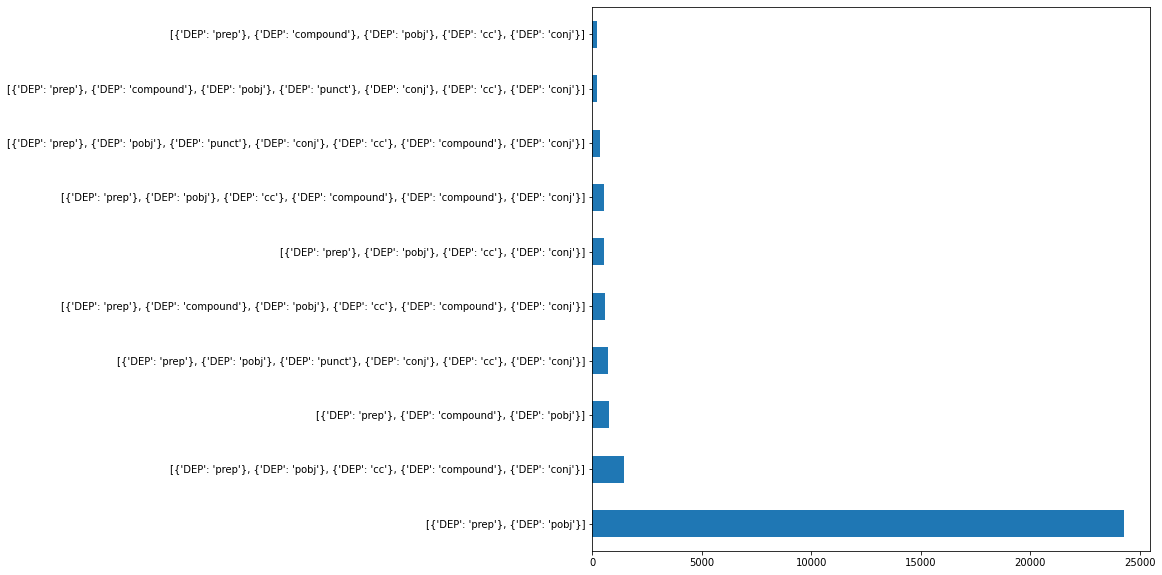

In [18]:
pd.Series(pattern_discover['location']).value_counts()[:10].plot(kind = "barh", figsize=(10, 10))

The above result is expected for location. A large percenetage of the jobs in Australia are concentrated in the major cities which are one word nouns, thus a simple preposition with an odject of prepostition will capture a large percentage of the jobs. Adding the part of speech tags "pronoun" will help in further distinguishing.

<AxesSubplot:>

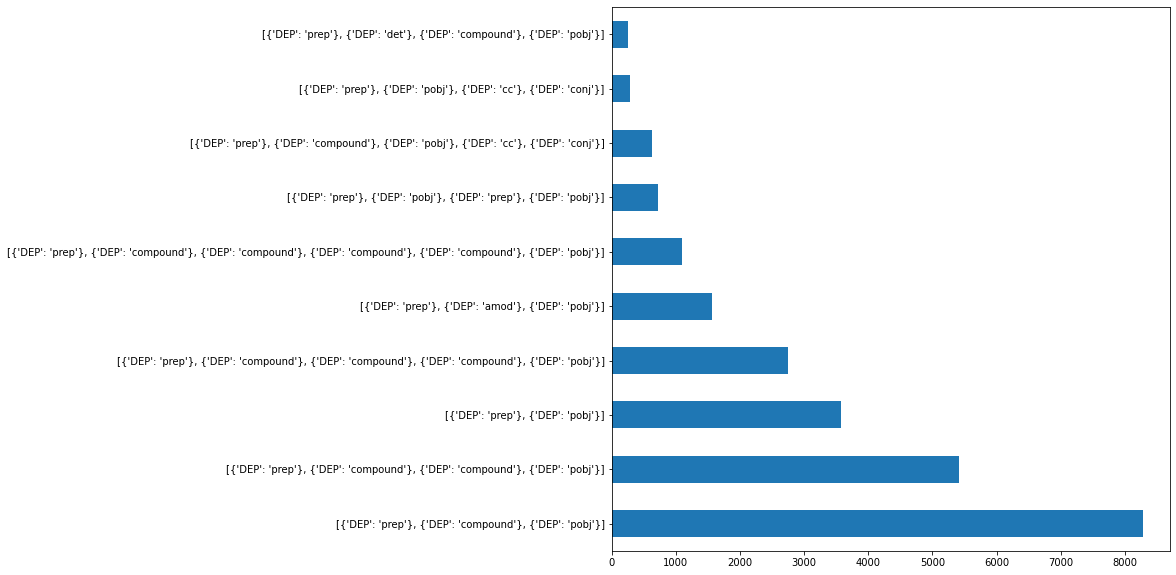

In [20]:
pd.Series(pattern_discover['company_name']).value_counts()[:10].plot(kind = "barh", figsize=(10, 10))

Company names have more variety and there is a bit of cross over with location and job names. Strategies to differentiate the two are necessary.

<AxesSubplot:>

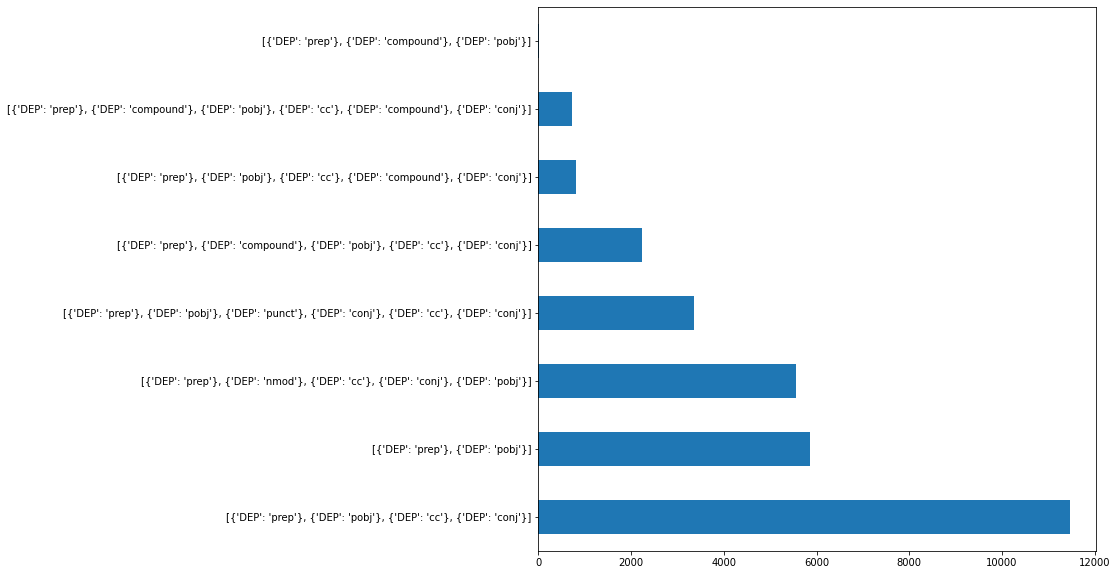

In [21]:
pd.Series(pattern_discover['job_category']).value_counts()[:10].plot(kind = "barh", figsize=(10, 10))

Appart from the simple preposition with an odject of prepostition pattern, job Categories are quite distinct from the other  patterns.

Job type has a maximum of six unique words thus searching for the lemma is more prudent than attempting to extract a dependency parttern.

In [ ]:
# unique information about job information 
import pandas as pd
seek_data = pd.read_csv("seek_australia.csv")

location = [nlp(text) for text in seek_data["city"].unique()]
job_category = [nlp(text) for text in seek_data["category"].unique()]

job_name = [nlp(text) for text in seek_data["job_title"].unique()]

company_name = [nlp(text) for text in seek_data["company_name"].unique()]


In [25]:
with open(f"job_category.pkl", "wb") as f:
    pickle.dump(job_category,f)

with open(f"job_name.pkl", "wb") as f:
    pickle.dump(job_name,f)

with open(f"location.pkl", "wb") as f:
    pickle.dump(location,f)


with open(f"company_name.pkl", "wb") as f:
    pickle.dump(company_name,f)

### Implementing the Bot

#### RUN ALL CELL BELOW TO START BOT

In [ ]:
# 
import telegram
import spacy
import pickle
import pandas as pd

In [2]:
with open(f"company_name.pkl", "rb") as f:
    company_name = pickle.load(f)


In [3]:
# LOADING THE DATA
with open(f"job_category.pkl", "rb") as f:
    job_category = pickle.load(f)

with open(f"job_name.pkl", "rb") as f:
    job_name = pickle.load(f)

with open(f"location.pkl", "rb") as f:
    location = pickle.load(f)

with open(f"company_name.pkl", "rb") as f:
    company_name = pickle.load(f)
    
with open(f"pattern_discover.pkl", 'rb') as f:
    pattern_discover = pickle.load(f)
    
with open(f"json_info.pkl",  'rb') as f:
    data =  pickle.load(f)    



In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')

    

from spacy.matcher import Matcher
#CREATING PATTERNS
def top_patt_extractor(job_info, pattern = pattern_discover):
    return pd.Series(pattern[job_info]).value_counts()[:10].index.tolist()

job_name_patterns  = top_patt_extractor("job_name")
location_patterns  = top_patt_extractor("location")
company_name_patterns  = top_patt_extractor("company_name")
job_category_patterns  = top_patt_extractor("job_category")
job_category_patterns.append([{"DEP":"prep"},{"LEMMA": {"IN": ["account"]}}])
job_type_extractor_p1 = [[{"LEMMA": {"IN": ["time"]}}]]
job_type_extractor_p2 = [[{"LEMMA": {"IN": ["casual"]}}], 
                         [{"LEMMA": {"IN": ["vacation"]}}], [{"LEMMA": {"IN": ["contract"]}}],
                        [{"LEMMA": {"IN": ["temp"]}}], [{"LEMMA": {"IN": ["temporary"]}}], 
                        [{"LEMMA": {"IN": ["vac"]}}]]

for item in location_patterns:
    item[item.index({'DEP': 'pobj'})] = {'POS': 'PROPN'}
    
for item in company_name_patterns:
    item[item.index({'DEP': 'pobj'})] = {'POS': 'PROPN'}

# CREATING pattern extractors
def match_compact(matches):
    
    ind = [matches[0]]
    for i in range(len(matches)):
                # Reducing repetition
        
        if  matches[i][1] == matches[min(i + 1, len(matches) - 1)][1]:
            
            ind.pop()
            
            ind.append(matches[min(i + 1, len(matches) - 1)])
        else:
            ind.append(matches[i])
    return ind

def type_convertor(type):
    if "full" in type:
        return 'Full Time'
    elif "part" in type:
        return 'Part Time'
    elif "vac" in type or "casu" in type:
        return 'Casual/Vacation'
    elif "temp" in type or "cont" in type:
        return 'Contract/Temp'
    
def job_type_extractor( doc, pattern1 = job_type_extractor_p1 , pattern2 = job_type_extractor_p2):
    user_info = ""
    nlp = spacy.load('en_core_web_sm')
    matcher = Matcher(nlp.vocab)
    matcher.add("pattern1" , pattern1)
    matcher.add("pattern2" , pattern2)
    matches = matcher(doc)
    for match_id, start, end in matches:
        if len(matches) > 0:

            if doc[start -1].lemma_ in ["full", 'part']:
                # if time sepearted by space
                user_info = doc[start -1: start+1].lemma_.lower()
            elif doc[start -2].lemma_ in ["full", 'part']:
                # if hyphenated
                user_info = doc[start -2: start+1].lemma_.lower()
            else:
                # finding if pattern exist in our list
                user_info = doc[start].lemma_.lower()
    
    return type_convertor(user_info)

def  category_extractor(doc, categories = job_category ,pattern = job_category_patterns):
    user_info = ""
    matcher = Matcher(nlp.vocab)
    matcher.add("pattern" , pattern)
    
    matches = matcher(doc)
    
    if len(matches) > 0:
        match_compact(matches)
        
        for match_id, start, end in matches:
            for category in categories:
               # checking if match exists
                
                if doc[start + 1].text.lower() in [token.text.lower() for token in category]:
                    
                    user_info = category.text
                    break
    if not user_info:
        start = None
               
    return start, user_info

def  location_extractor(doc, matched,locations = location,pattern = job_category_patterns):
    
    user_info = ""
    matcher = Matcher(nlp.vocab)
    matcher.add("pattern" , pattern)
    
    matches = matcher(doc)
    
    if len(matches) > 0:
        match_compact(matches)
        for match_id, start, end in matches:
            if doc[start + 1].pos_ == 'PROPN' and start != matched:
                # use this to avoid repeating categories
                for location in locations:

                    if doc[start + 1].text in ["Mt", "Port"]:
                        # MT and Port both have two places that start with these prefixes
                        comp = doc[start + 2].text
                    else:
                        comp = doc[start + 1].text
                    if comp in [token.lemma_ for token in location]:

                        user_info = location.text
                        break
    if not user_info:
        start = None
               
    return start ,user_info

def  company_name_extractor(doc, matched1, matched2 ,names  = company_name ,pattern = company_name_patterns):
    user_info = ""
    matcher = Matcher(nlp.vocab)
    matcher.add("pattern" , pattern)
    
    matches = matcher(doc)
    
    if len(matches) > 0:
        match_compact(matches)
        for match_id, start, end in matches:
            if start not in [matched1, matched2]:
                for name in names:
                   # checking if match exists
                    temp_list = [token.lemma_.lower() for token in name]
                    if doc[start + 1].lemma_.lower() in temp_list:
                        
                        #checks if frist word in match existst in tokenize comapny list
                        if start - end > 1:
                            if doc[min(start + 2, len(doc) - 1)].dep_ != "cc":
                                #checks if second word in match existst in tokenize comapny list
                                if  doc[min(start + 2, len(doc) - 1)].lemma_.lower() in temp_list:
                                    user_info = name.text
                                    break
                            else:
                                #checks if second word in match existst in tokenize comapny list
                                if  doc[min(start + 3, len(doc) - 1)].lemma_.lower() in temp_list:
                                    user_info = name.text
                                    break
                        else:
                            user_info = name.text
                            break
    if not user_info:
        start = None
               
    return start, user_info

def  job_name_extractor(doc, matched1, matched2, matched3 , names = job_name, pattern = job_name_patterns):
    
    user_info = ""
    matcher = Matcher(nlp.vocab)
    matcher.add("pattern" , pattern)
    
    matches = matcher(doc)
   
    if len(matches) > 0:
        match_compact(matches)
        for match_id, start, end in matches:
            if start not in [matched1, matched2,matched3]:
                if doc[start + 2].text not in ["job"]:
                    for name in names:
                       # checking if match exists
                        temp_list = [token.lemma_.lower() for token in name]
                        if len(name) <= end - start:
                            # all jobs have a preposition and a determinant preceeding the name
                            if doc[start + 2].lemma_.lower() in temp_list:
                                
                                #checks if frist word in match existst in tokenize comapny list
                                if start - end > 4:
                                    if doc[min(start + 3, len(doc) - 1)].dep_ != "cc":
                                        #checks if second word in match existst in tokenize comapny list
                                        if  doc[min(start + 3, len(doc) - 1)].lemma_.lower() in temp_list:
                                            user_info = name.text
                                            break
                                    else:
                                        #checks if third word in match existst in tokenize comapny list
                                        if  doc[min(start + 4, len(doc) - 1)].lemma_.lower() in temp_list:
                                            user_info = name.text
                                            break
                                else:
                                    user_info = name.text
                                    break
               
    return user_info
     



def experience_extractor(doc):
    from spacy.matcher import Matcher
    experience = ""
    exp = [[{"LEMMA": {"IN": ["experience"]}}, {"DEP": "prep"}],[{"LEMMA": {"IN": ["work"]}}, {"DEP": "prep"}]]
    exp1 = [[{"DEP": "det"},{"LEMMA": {"IN": ["experience"]}}]]
    exp2 = [[{"DEP": "nummod"}, {"DEP": "compound"},{"LEMMA": {"IN": ["experience"]}}]]
    matcher = Matcher(nlp.vocab)
    matcher.add('exp', exp)
    matcher.add('exp1', exp1)
    matcher.add('exp2', exp2)
    matches = matcher(doc)
    
    for match_id, start, end in matches:
        if doc.vocab.strings[match_id] =='exp' or doc.vocab.strings[match_id] =='exp2':
            # extracting the rest of the sentence that follows the first snd third pattern match
            experience = " ".join([token.text for token in doc[start].subtree])
        elif doc.vocab.strings[match_id] =='exp1':
            experience = "No experience"
       
            
        return experience


    

# UTTERANCE FOR THE BOT


def utterance(update, context):
    global user_job_type
    global user_location 
    global user_company_name 
    global user_category 
    global user_job_name 
    global user_description
    global user_experience
    global current_selection 
    msg = update.message.text
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(msg)
    if doc.text.lower() == "/start" or doc.text.lower() == "restart":
        if doc.text.lower() == "/start":
            update.message.reply_text(f"Hi, I am your job assistant. I will help you find the job you are looking.")
            update.message.reply_text("For the best expereince, please maintain propper grammar and sentence structure.")
        update.message.reply_text("Please provide details of the job you are looking for ane your expereince.")
        
        user_job_type = ""
        user_location = ""
        user_company_name = ""
        user_category = ""
        user_job_name = ""
        user_description = ""
        user_experience = ""

        current_selection = data.copy()
        
    elif len(doc) == 1:
        update.message.reply_text("Please avoid one word answers")
    else:
        # Extracting information from user message and replying
        match1 = None
        match2 = None
        match3 = None
        update.message.reply_text("We are processing your request")
        if not user_job_type:
            user_job_type = job_type_extractor(doc)
        if not user_category:
            match1,user_category = category_extractor(doc)

        if not user_location:
            match2, user_location = location_extractor(doc, match1)
        if not user_company_name:
            match3, user_company_name = company_name_extractor(doc, match1, match2 )
        if not user_job_name:
            user_job_name = job_name_extractor(doc, match1, match2, match3 )

        if not user_experience:
            # user_experience = experience_extractor(doc)
            pass
        
        
        if user_category:
            
            current_selection =  list(filter(lambda x: x['category'] == user_category, current_selection))
        if user_job_type:
            
            current_selection = list(filter(lambda x: x['job_type'] == user_job_type, current_selection))
        
        if user_location:
            
            current_selection = list(filter(lambda x: x['location'] == user_location, current_selection))

        if user_company_name:
            current_selection = list(filter(lambda x: x['company_name'] == user_company_name, current_selection))
        if user_job_name:
            current_selection = list(filter(lambda x: x['job_title'] == user_job_name, current_selection))
        update.message.reply_text("Almost done")
        if len(current_selection ) > 1:
            update.message.reply_text(f"We have over {len(current_selection )} results, please elaborate.")
            if not user_job_type:
                update.message.reply_text(f"Please provide information on job type.")
            if not user_category:
                update.message.reply_text(f"Please provide industry you are interested in.")

            if not user_location:
                for token in doc:
                    if token.ent_type_ == "GPE":
                        update.message.reply_text(f"We do not have a job in your desired location.")
                        break
                update.message.reply_text(f"Please provide information on which city you'd like to work in.")
                
            if not user_company_name:
                update.message.reply_text(f"Please provide information on the company you'd like to work for.")
                
            if not user_job_name:
                update.message.reply_text(f"Please provide the name of the job you want.")
                
        elif len(current_selection ) == 0:
            update.message.reply_text("Sorry, We could not find a job with those details.")
            update.message.reply_text("Type restart to start over")
        elif len(current_selection ) == 1:
            update.message.reply_text(f"here is a job that fit your specification ")
            update.message.reply_text(f"{current_selection[0]['job_description']}")
        elif  user_job_type and user_location and user_company_name and user_category and \
        user_job_name and user_description and user_experience and\
        len(current_selection ) > 1:
            # all information is provided but we still have more than one selection
            for selection in current_selection:
                update.message.reply_text(f"{election[0]['job_description']}")
            
        
        return

In [5]:
TOKEN = "5186693765:AAEB-jj70OfR8OPR-tBqGwrJNsvbqbXuwO0"
bot = telegram.Bot(token=TOKEN)

###### The first message to the bot should be "/start"

In [11]:
from telegram.ext import Updater, MessageHandler, Filters
#the callback function that uses spaCy

        
#the code responsible for interactions with Telegram
updater = Updater(TOKEN, use_context=True)
updater.dispatcher.add_handler(MessageHandler(Filters.text, utterance))
updater.start_polling()
updater.idle()

No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "C:\Users\jcary\AppData\Roaming\Python\Python38\site-packages\telegram\ext\dispatcher.py", line 555, in process_update
    handler.handle_update(update, self, check, context)
  File "C:\Users\jcary\AppData\Roaming\Python\Python38\site-packages\telegram\ext\handler.py", line 198, in handle_update
    return self.callback(update, context)
  File "<ipython-input-10-8a24215643dc>", line 242, in utterance
    msg = update.message.text
AttributeError: 'NoneType' object has no attribute 'text'


In [8]:
# print(bot.get_me())

#### Bot Details
* username: 'Ytdj_bot'
* id: 5186693765
* first_name: 'Me'

#### Test Sentences

##### Job Title

* I am looking for a job as an accountant
* Show me jobs for spray painter

##### Location

* I am looking for a job in Sydney
* I want to work in Northam and Wheatbelt

##### Company Name

* Do you have jobs in Kaplan
* I want to work for Bakers Delight G&M

##### Category

* Show me jobs in accounting
* I want jobs in Government & Defence

##### Experience

* I have no experience, show me casual jobs
* I have ten years expereince in accounting show me full time jobs.



### Frequent sequence mining for frequent linguistic patterns 
Frequent sequence mining for frequent linguistic patterns is concerned with identifying sequence of words that tend to occur together at a higher than normal rate and thus may form a different meaning when looked at individually as opposed to together. Some examples in job description would be “part time” and “full time ” job types. Others have a higher frequency but maintaing there meaning when looked at individually and together.  Identifying these patterns is crucial to drawing out meaning from the text, extracting information or document classification.

Nltk function called bigrams() or spacy’s noun chunks can be used to identify frequent sequences.  Some data exploration will help in identifying the best frequency threshold to use to draw out the most useful sequences. Once these are extracted, it is then easier to work with the data for TFID and document classification or other processes. Without these process some crucial sequences might be eliminated when exploring the TFIDF prior to training and classifying documents. They will also be considered individually which will lead to a weak model. 

